In [14]:
import pandas as pd

In [15]:
file_dir = '../Data/'

In [16]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [17]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [18]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')


In [19]:
kaggle_metadata['video'].value_counts(dropna=False)

False    45358
True        93
NaN          3
Name: video, dtype: int64

In [20]:
kaggle_metadata[~kaggle_metadata['video'].isin([True, False])]


,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'
kaggle_metadata['video'] = kaggle_metadata['video'] == True


In [22]:
kaggle_metadata['video'].value_counts(dropna=False)

False    45361
True        93
Name: video, dtype: int64

In [23]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [24]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [25]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

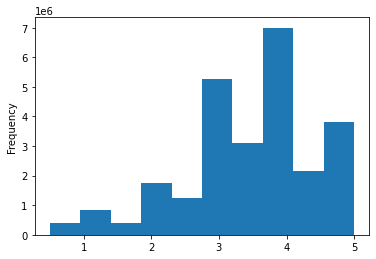

In [26]:
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [40]:
rating_counts = ratings.groupby(['movieId', 'rating'], as_index=False).count() \
    .rename(columns={'userId': 'count'}) \
    .pivot(index='movieId', columns='rating', values='count')
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]
rating_counts.sample()


,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
movieId,,,,,,,,,,
1,441.0,804.0,438.0,2083.0,1584.0,11577.0,5741.0,22020.0,5325.0,15995.0
2,263.0,797.0,525.0,2479.0,1810.0,8510.0,2916.0,6035.0,690.0,2035.0
3,169.0,772.0,233.0,1665.0,616.0,6213.0,759.0,3433.0,154.0,1483.0
4,47.0,351.0,31.0,496.0,77.0,1133.0,66.0,557.0,12.0,211.0
5,237.0,785.0,270.0,1716.0,664.0,6608.0,723.0,2959.0,166.0,1130.0
...,...,...,...,...,...,...,...,...,...,...
176267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
176269,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
176271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
